Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```
__Organize in teams of 2 people, return the exercise by Tue, Nov 19, 2019 (10:00 AM) using ILIAS (_only one Jupyter Notebook .ipyb file_)__

---

Assignment 03 in R - _(20 Points)_
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: PCA - _(6 Points)_

We want to apply the principal component analysis (PCA) to the following data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any built-in function.

In [43]:
set.seed(100)
m0 <- matrix(runif(4), nrow=2)
m1 <- matrix(runif(400), nrow=2)
data <- t(m0 %*% m1)

##### __(a) Subtract the mean of the attributes__

In [150]:
data <- data - mean(data)

##### __(b) Compute the covariance matrix.__

In [151]:
covar <- cov(data)

##### __(c) Determine the eigenvalues/eigenvectors of the matrix.__

In [152]:
eig <- eigen(matrix(covar, nrow=2))

##### __(d) Transform the data using the eigenvectors and plot the result.__

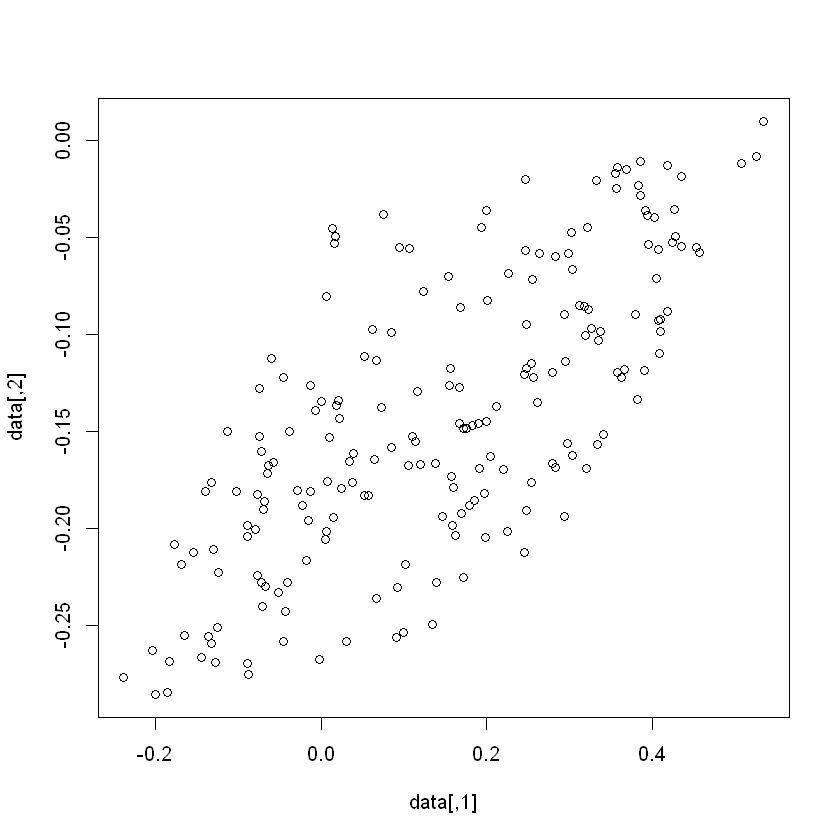

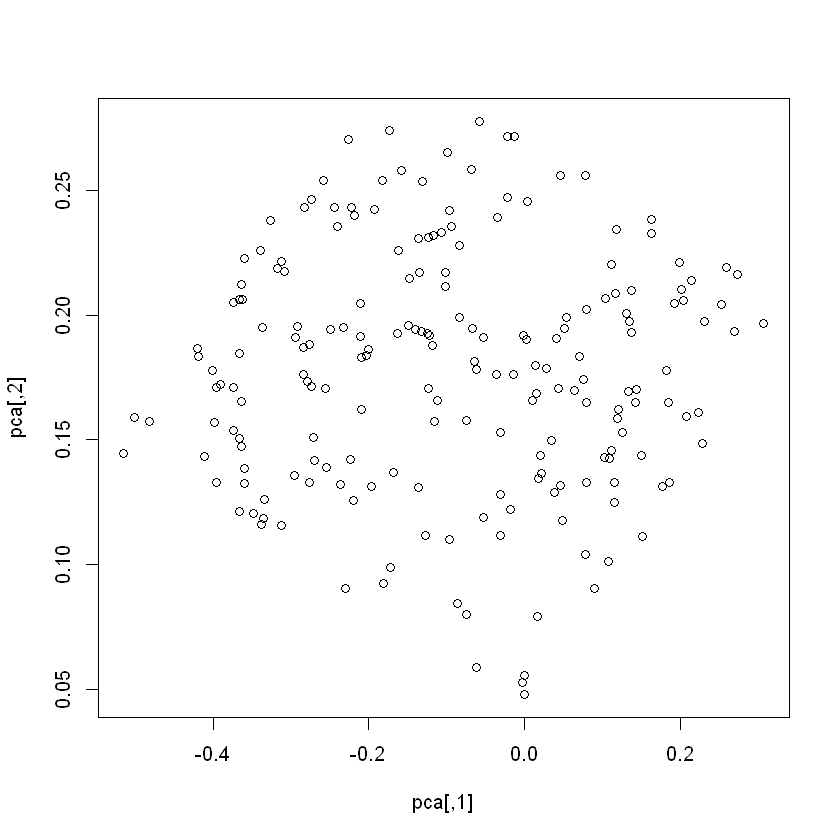

In [153]:
pca <- data %*% eig$vectors
plot(data, type="p")
plot(pca, type="p")

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

eigen() decomposition
$values
[1] 0.037533312 0.002312603

$vectors
           [,1]       [,2]
[1,] -0.9576984  0.2877740
[2,] -0.2877740 -0.9576984


##### __(f) Imagine you have a dataset with 4 attributes. How many Eigenvalues would you get during step c?__

---

#### Exercise 2: Linear Interpolation - _(4 Points)_
Given the following dataset: 

In [124]:
time <- c(1, 3, 5)
temperature <- c(3, 8, 12)
df = data.frame(time, temperature)
print(df)

  time temperature
1    1           3
2    3           8
3    5          12


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

In [103]:

interpolate <- function(hour){
    below<-tail(subset(df, time < hour),1)
    above<-tail(subset(df, time > hour),1)
    y1 <- below$temperature
    y2 <- above$temperature
    x1 <- below$time
    x2 <- above$time
    return (y1 + (y2 - y1) * (hour - x1) / (x2 - x1))
}


interpolate(4)

[1] 10

##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

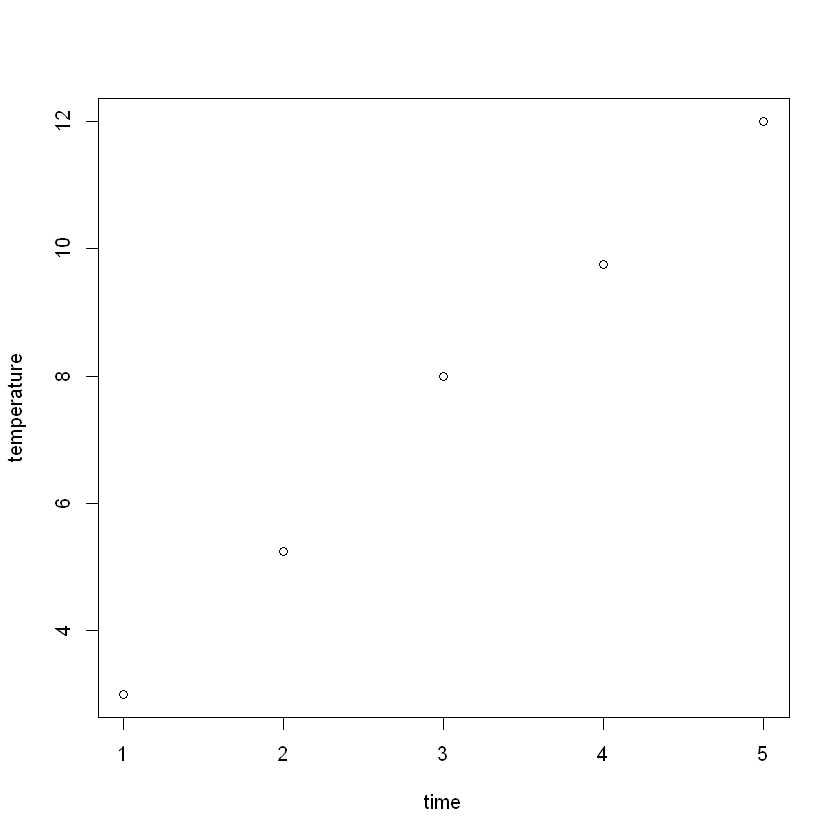

In [130]:
df <- rbind(df, c(2, interpolate(2)))
df <- rbind(df, c(4, interpolate(4)))

plot(df)

---

#### Exercise 3: Decision Tree - _(6 Points)_
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the de-cision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

---

#### Exercise 4: Decision Tree in Python - _(4 Points)_
In this task we will train and display a decision tree for the ``iris.csv``data in Python. Only use the already imported packages for the each task. 

The classes of the flowers are mapped to numbers as follows: ``Iris-Setosa = 0``, ``Iris-Versicolour = 1``, ``Iris-Virginica = 2``

In [143]:
# Run here. In case of problems accessing the library functionalities, also try running the commands in the R console.
if (!require('RWeka')) {
    install.packages('RWeka')
    library('RWeka')
}
if (!require('partykit')) {
    install.packages('partykit')
    library('partykit')
}

iris <- read.csv('iris.csv')

##### __(a) Create a decision tree using the information gain and train the decision tree with the iris data. Use the ``species`` column as the target variable__ 

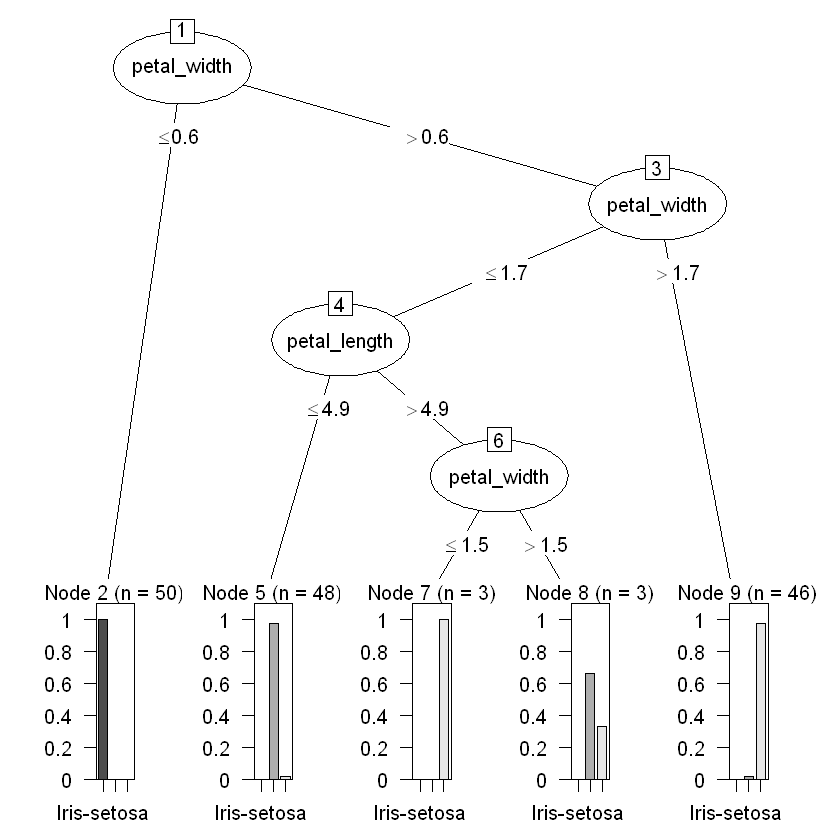

In [149]:
require('RWeka')

tree <- J48(species ~ ., data = iris)
plot(tree)

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__ _(Hint: use the ``plot()`` function)_

---